In [114]:
import pandas as pd
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)
    
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [53]:
meta_df = getDF('meta_Prime_Pantry.json.gz')
rows,columns=meta_df.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)
meta_df.head()

('Number of rows: ', 10815)
('Number of columns: ', 11)


,asin,description,title,also_buy,image,price,details,brand,also_view,rank,feature
0,B00005BPJO,[Sink your sweet tooth into MILK DUDS Candya d...,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",[https://images-na.ssl-images-amazon.com/image...,$5.00,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Milk Duds,NaN,NaN,NaN
1,B00005BPJO,[Sink your sweet tooth into MILK DUDS Candya d...,"HERSHEY'S Milk Duds Candy, 5 Ounce(Halloween C...","[B019KE37WO, B007NQSWEU]",[https://images-na.ssl-images-amazon.com/image...,$5.00,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Milk Duds,NaN,NaN,NaN
2,B0000DIF38,[A perfect Lentil soup starts with Goya Lentil...,"Goya Dry Lentils, 16 oz","[B003SI144W, B000VDRKEK]",[https://images-na.ssl-images-amazon.com/image...,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Goya,"[B074MFVZG7, B079PTH69L, B000VDRKEK, B074M9T81...",NaN,NaN
3,B0000DIWNI,[Saran Premium Wrap is an extra tough yet easy...,"Saran Premium Plastic Wrap, 100 Sq Ft","[B01MY5FHT6, B000PYF8VM, B000SRMDFA, B07CX6LN8...",[https://images-na.ssl-images-amazon.com/image...,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Saran,"[B077QLSLRQ, B00JPKW1RQ, B000FE2IK6, B00XUJHJ9...",NaN,NaN
4,B0000DIWNZ,[200 sq ft (285 ft x 11-3/4 in x 18.6 m2). Eas...,"Saran Cling Plus Plastic Wrap, 200 Sq Ft",NaN,[https://images-na.ssl-images-amazon.com/image...,NaN,"\n <div class=""content"">\n\n\n\n\n\n\n<ul...",Saran,[B0014CZ0TE],NaN,NaN


https://www.kaggle.com/dhanyajothimani/basic-visualization-and-clustering-in-python

In [54]:
#Dropping unused variables
meta_df.drop(['description', 'image', 'details', 'feature', 'title', 'also_buy', 'also_view', 'title', 'brand'],axis=1,inplace=True)

In [55]:
meta_df.head()

,asin,price,brand,rank
0,B00005BPJO,$5.00,Milk Duds,NaN
1,B00005BPJO,$5.00,Milk Duds,NaN
2,B0000DIF38,NaN,Goya,NaN
3,B0000DIWNI,NaN,Saran,NaN
4,B0000DIWNZ,NaN,Saran,NaN


In [10]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

https://visualstudiomagazine.com/articles/2018/04/01/clustering-non-numeric-data.aspx

Cluster with price, rank and overall review score

In [64]:
review = pd.read_csv('Prime_Pantry.csv', header=None, names=['asin', 'reviewerID', 'rating'])
review.head()

,asin,reviewerID,rating
0,B0000DIWNZ,A1NKJW0TNRVS7O,5.0
1,B0000DIWNZ,A2L6X37E8TFTCC,4.0
2,B0000DIWNZ,A2WPR4W6V48121,4.0
3,B0000DIWNZ,A27EE7X7L29UMU,3.0
4,B0000DIWNZ,A1OWT4YZGB5GV9,4.0


In [175]:
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', review['asin'].nunique())

('Number of unique product in Raw data = ', 10814)


In [77]:
# Calculate mean of overall rating for each asin 
group = review.groupby('asin')['rating'].unique()

asin
B00005BPJO    [2.0, 3.0, 4.0, 5.0, 1.0]
B0000DIF38                        [5.0]
B0000DIWNI    [4.0, 5.0, 1.0, 3.0, 2.0]
B0000DIWNZ         [5.0, 4.0, 3.0, 1.0]
B0000GH6UG         [1.0, 5.0, 4.0, 3.0]
B0000KC2BK                        [5.0]
B0001E1IN8              [5.0, 4.0, 2.0]
B00032E8XK    [5.0, 3.0, 4.0, 1.0, 2.0]
B0005XMTHE                   [1.0, 5.0]
B0005XNE6E                        [5.0]
B0005YM4IC                        [5.0]
B0005YMCN4                        [5.0]
B0005ZHPQ2                   [5.0, 1.0]
B0005ZYFEW                        [4.0]
B0005ZYFM4                        [5.0]
B00061EPCM                   [5.0, 3.0]
B00061EU6S              [5.0, 4.0, 2.0]
B00061EWFC                   [1.0, 5.0]
B0006L0UVM              [2.0, 5.0, 4.0]
B0007CXWCO         [2.0, 5.0, 4.0, 3.0]
B0007PB6TC                   [5.0, 1.0]
B00099XLXU    [5.0, 4.0, 1.0, 2.0, 3.0]
B00099XNXS    [5.0, 1.0, 4.0, 3.0, 2.0]
B00099XO3W    [5.0, 1.0, 4.0, 3.0, 2.0]
B00099XO50    [5.0, 1.0, 4.0, 3.0, 

In [78]:
group.to_dict()

{'B01487LP9K': array([2., 5.]),
 'B000WD397G': array([5., 3., 2.]),
 'B015ZIFISA': array([3., 5., 4.]),
 'B00TDFMI4Y': array([5., 1., 3., 2., 4.]),
 'B01EUIKF66': array([5., 4., 3.]),
 'B00NQ2VE1S': array([3., 4., 5., 1., 2.]),
 'B00YMROR4C': array([5., 3., 4., 2.]),
 'B016RY502U': array([5.]),
 'B00UBLGOEE': array([5.]),
 'B0166NOBW2': array([4., 5.]),
 'B00WU4U0R2': array([5., 3.]),
 'B01DXS67JS': array([5.]),
 'B01EMYODRU': array([5., 4., 3., 1.]),
 'B01FW4ZGVG': array([5., 4., 3., 2.]),
 'B017XKOQ5Y': array([5., 4., 3., 1., 2.]),
 'B017XKK9DM': array([5., 3., 4., 2., 1.]),
 'B00I3N3L66': array([5., 2., 1., 4., 3.]),
 'B00RVJ4HZ2': array([2., 5., 3., 4.]),
 'B01HHVRYHG': array([5., 1.]),
 'B00WU24H1E': array([5., 4., 1., 2.]),
 'B00U6DJNMM': array([5., 1., 4., 3.]),
 'B010VEANGU': array([4., 5., 3., 1., 2.]),
 'B01COSHFG2': array([3., 5., 1., 2., 4.]),
 'B00GZZOOYC': array([3.]),
 'B0151FENWY': array([5., 4., 1., 3., 2.]),
 'B01G3N434G': array([5., 3.]),
 'B00UT48EXC': array([5., 4.

In [91]:
for k in group.keys():
    group[k] = np.mean(group[k])
    
meta_df['rating'] = meta_df['asin'].map(group)

In [101]:
meta_df[meta_df.columns[1]] = meta_df[meta_df.columns[1]].replace('[\$,]', '', regex=True).astype(float)
meta_df[meta_df.columns[2]] = meta_df[meta_df.columns[2]].replace('[^0-9]', '', regex=True).astype(float)
meta_df.head()
#cluster = meta_df[['price', 'rank',]]
#cluster

,asin,price,rank,rating
0,B00005BPJO,5.0,NaN,3.00
1,B00005BPJO,5.0,NaN,3.00
2,B0000DIF38,NaN,NaN,5.00
3,B0000DIWNI,NaN,NaN,3.00
4,B0000DIWNZ,NaN,NaN,3.25


In [109]:
#Remove duplicates asin
meta_df.drop_duplicates(subset ="asin", keep = 'first', inplace = True) 

In [111]:
cluster = meta_df[['price', 'rank', 'rating']]

           price      rank    rating
price   1.000000  0.149384  0.061102
rank    0.149384  1.000000  0.367336
rating  0.061102  0.367336  1.000000


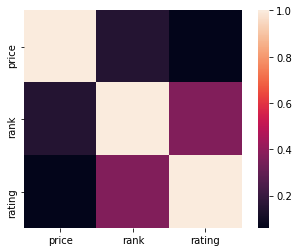

In [117]:
cor = cluster.corr()
print cor
sns.heatmap(cor, square = True)

In [159]:
# Deal with missing data
#https://www.displayr.com/5-ways-deal-missing-data-cluster-analysis
nonan_cluster = cluster[(pd.notna(cluster['price']) == True) & 
                        (pd.notna(cluster['rank']) == True) & 
                        (pd.notna(cluster['rating']) == True)]

In [166]:
nonan_cluster.head(10)

,price,rank,rating,kmeans
6,3.09,372929.0,5.0,1.0
16,3.79,194965.0,4.0,1.0
18,1.69,1017905.0,3.0,1.0
22,2.44,1243.0,3.0,1.0
30,1.19,1266.0,3.0,1.0
37,1.29,1020.0,3.0,1.0
44,2.24,320.0,3.0,1.0
46,2.09,573.0,3.0,1.0
48,0.98,929.0,3.0,1.0
50,0.98,1428.0,3.0,1.0


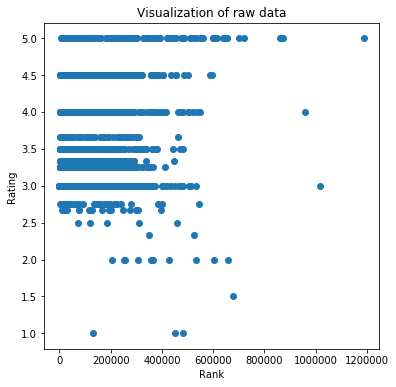

In [173]:
plt.figure(figsize=(6, 6))
plt.scatter(nonan_cluster.iloc[:, 1], nonan_cluster.iloc[:, 2])
plt.xlabel('Rank')
plt.ylabel('Rating')
plt.title('Visualization of raw data');

In [169]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(nonan_cluster)

array([[-0.50728218,  2.23248354,  2.84324413,  0.60135149],
       [-0.39592626,  0.77896167,  1.11589488,  0.60135149],
       [-0.72999402,  7.50032828, -0.61145437,  0.60135149],
       ...,
       [-0.07458489, -0.61210329, -0.17961705,         nan],
       [-0.06504009, -0.08620581,  0.25222026,         nan],
       [ 0.0860858 ,  1.3098495 ,  2.84324413,         nan]])

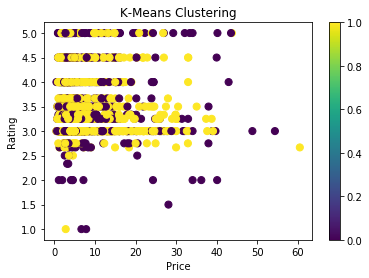

In [161]:
# K-mean clustering
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(nonan_cluster, 2)
kmeans = pd.DataFrame(clust_labels)
nonan_cluster.insert((nonan_cluster.shape[1]),'kmeans',kmeans)

#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(nonan_cluster['price'],nonan_cluster['rating'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('Rating')
plt.colorbar(scatter)

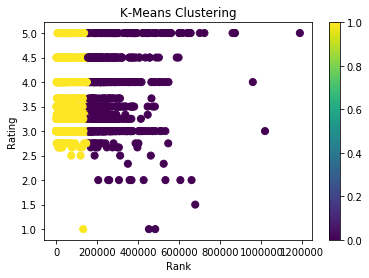

In [153]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(nonan_cluster['rank'],nonan_cluster['rating'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Rank')
ax.set_ylabel('Rating')
plt.colorbar(scatter)

In [162]:
nonan_cluster

,price,rank,rating,kmeans
6,3.09,372929.0,5.000000,1.0
16,3.79,194965.0,4.000000,1.0
18,1.69,1017905.0,3.000000,1.0
22,2.44,1243.0,3.000000,1.0
30,1.19,1266.0,3.000000,1.0
37,1.29,1020.0,3.000000,1.0
44,2.24,320.0,3.000000,1.0
46,2.09,573.0,3.000000,1.0
48,0.98,929.0,3.000000,1.0
50,0.98,1428.0,3.000000,1.0
